## Import / check gpu / prepare dataset

In [1]:
from fastai.vision.widgets import *
from fastai.vision.all import *

In [61]:
# CUDA
if torch.cuda.is_available(): print("using cuda:", torch.cuda.get_device_name(0))
else: print("using cpu")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

using cuda: Quadro P5000


In [35]:
path = untar_data(URLs.MNIST) # return Path python object

In [36]:
path

Path('/storage/data/mnist_png')

### Model

In [37]:
model_block = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label)

In [38]:
model_block = model_block.new(item_tfms=RandomResizedCrop(28, min_scale=0.2))
dls = model_block.dataloaders(path)

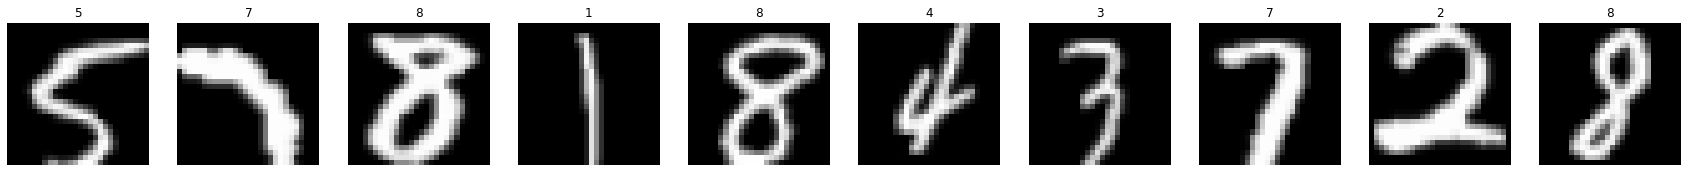

In [39]:
dls.valid.show_batch(max_n=10, nrows=1)

In [41]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.317747,0.629789,0.200000,00:41


epoch,train_loss,valid_loss,error_rate,time
0,0.481843,0.090779,0.028286,00:42
1,0.338293,0.058736,0.017143,00:42
2,0.263419,0.040537,0.012857,00:41
3,0.242627,0.037993,0.012000,00:42


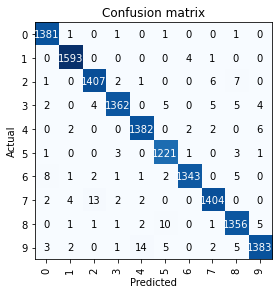

In [42]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

## Clean (unneccesarry)

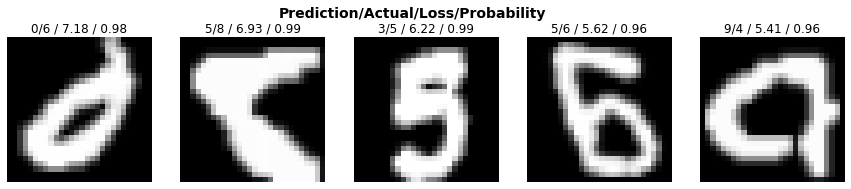

In [43]:
interp.plot_top_losses(5, nrows=1)

In [44]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [45]:
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

## Save and load model

In [ ]:
### Get image
#from PIL import Image
#sample_img_path = (path/"train/0/0.png")
#sam_img = Image.open(sample_img_path)
sam_img = Image.open("../images/sample_image.png")
sam_img = sam_img.resize((28, 28))
#sam_img.to_thumb(128, 128)
sam_img.save("../images/sample_image_.png", "PNG")

In [46]:
learn.export()

In [47]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [48]:
learn_inf = load_learner(path/'export.pkl')
learn_inf.predict("../images/sample_image_.png")

('7',
 TensorImage(7),
 TensorImage([7.0353e-05, 3.8019e-04, 7.6003e-03, 2.6782e-03, 1.5043e-04, 8.7992e-04,
         1.5203e-05, 9.8776e-01, 2.4884e-04, 2.1443e-04]))

In [49]:
learn_inf.dls.vocab

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

## Deploying

In [58]:
# Prepare buttons (Voila -> widgets)
btn_upload = widgets.FileUpload()
btn_run = widgets.Button(description="Classify")
out_pl = widgets.Output()
lbl_pred = widgets.Label()

In [59]:
# button for predicting using model
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f"Prediction: {pred}; Probability: {probs[pred_idx]:.04f}"

btn_run.on_click(on_click_classify)

In [60]:
# show widgets
VBox([widgets.Label("Select your digit! (will classify last uploaded)"), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [14]:
try:
    !pip install voila
    !conda install -c conda-forge voila -y
except:
    pass
!jupyter serverextension enable --sys-prefix voila

Solving environment: done

# All requested packages already installed.

Enabling: voila
- Writing config: /opt/conda/envs/fastai/etc/jupyter
    - Validating...
      voila 0.2.4 OK
